<a href="https://colab.research.google.com/github/jvataidee/PesquisaOperacional/blob/master/maxloglihood_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://bsbr.com.br/wp-content/uploads/2018/05/01_logo-bsbr-padrao-med.png" alt="Texto alternativo" width="150" height="50" />




#Maximum Likelihood Estimation - MLE
Equipe: 
* Daniella Tombi
* Geraldo Jorge 
* João Ataide
* Leonardo Ciotti 
* Lucas Tayrone 
* Robson Nascimento

Ao lidar com problemas de tomada de decisão, as alternativas ou estados possíveis (também chamados de estados da natureza) ocorrem em um certo nível de incerteza, o que pode envolver a aplicação de probabilidades chamadas de risco. Nesse caso, não se trata de aplicar o método de maximização/minimização, pois a ocorrência de eventos incertos pode afetar o valor dos ganhos esperados, o que possibilita a escolha do maior ou menor dos ganhos. Portanto, devemos usar os valores médios ou esperados.


In [291]:
!pip install yfinance -q

In [292]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

## Baixando ações da bolsa 

* AAPL - Apple Inc. - Empresa multinacional de tecnologia com sede nos Estados Unidos, conhecida por seus produtos eletrônicos e software, como o iPhone, iPad, Mac e iOS.
* AMZN - Amazon.com, Inc. - Empresa americana de comércio eletrônico e serviços de computação em nuvem, que também oferece streaming de vídeo e música, inteligência artificial e muito mais.
* GOOGL - Alphabet Inc. - A holding que possui o Google, uma das maiores empresas de tecnologia e serviços de Internet do mundo, incluindo o mecanismo de pesquisa Google, YouTube, Android e outras plataformas e produtos.
* TSLA - Tesla, Inc. - Empresa americana de veículos elétricos e energia limpa, conhecida por seus carros elétricos, baterias de armazenamento de energia e soluções de energia solar.
* PFE - Pfizer Inc. - Empresa farmacêutica multinacional americana, envolvida na descoberta, desenvolvimento e produção de medicamentos e vacinas para diversas áreas terapêuticas.
* BA - The Boeing Company - Uma das maiores fabricantes de aeronaves e equipamentos de defesa do mundo, com sede nos Estados Unidos.
* PETR4.SA - Petróleo Brasileiro S.A. (Petrobras) - Empresa estatal brasileira de exploração, produção e distribuição de petróleo e gás.
* VALE3.SA - Vale S.A. - Uma das maiores empresas de mineração e metais do mundo, com sede no Brasil, envolvida na extração de minério de ferro, níquel, cobre e outros metais.
* EMBR3.SA - Embraer S.A. - Empresa brasileira de aeronáutica e defesa, fabricante de aeronaves comerciais, executivas, militares e agrícolas.
* SLCE3.SA - SLC Agrícola S.A. - Empresa agrícola brasileira, focada na produção de commodities agrícolas, como algodão, soja e milho.

In [293]:
tickers = ['AAPL', 'AMZN', 'GOOGL', 'TSLA', 'PFE', 'BA', 'PETR4.SA', 'VALE3.SA',
           'EMBR3.SA', 'SLCE3.SA', 'AMER3.SA']
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(years=5)
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.head()

[*********************100%***********************]  11 of 11 completed


,AAPL,AMER3.SA,AMZN,BA,EMBR3.SA,GOOGL,PETR4.SA,PFE,SLCE3.SA,TSLA,VALE3.SA
Date,,,,,,,,,,,
2018-03-26,41.176319,25.260567,77.792999,315.053589,21.284210,52.704498,9.707685,27.716949,10.621039,20.278667,28.971750
2018-03-27,40.120518,23.845898,74.852501,307.535736,21.343884,50.347000,9.447696,27.693222,10.769034,18.612000,28.185371
2018-03-28,39.677219,23.836208,71.570999,306.482239,21.284210,50.258999,9.341937,27.922617,11.115408,17.185333,28.654438
2018-03-29,39.987053,24.843918,72.366997,314.009705,21.433397,51.856998,9.434477,28.072908,10.879245,17.742001,29.116608
2018-04-02,39.724884,24.155962,68.599503,308.799866,21.184752,50.631500,9.209740,27.724867,10.684015,16.832001,29.661552


In [294]:
ticker_colors = {
    'AAPL': '#4D4D4D',   # Apple logo color (gray)
    'AMZN': '#0080FF',   # Amazon logo color (bright blue)
    'GOOGL': '#DB4437',  # Google logo color (red)
    'TSLA': '#CC0000',   # Tesla logo color (bright red)
    'PFE': '#00B0F0',    # Pfizer logo color (light blue)
    'BA': '#0070C0',     # Boeing logo color (dark blue)
    'PETR4.SA': '#8B0000', # Petrobras logo color (dark red)
    'VALE3.SA': '#32CD32', # Vale logo color (lime green)
    'EMBR3.SA': '#9400D3', # Embraer logo color (dark violet)
    'SLCE3.SA': '#228B22',  # SLC Agrícola logo color (forest green)
    'AMER3.SA': '#E41B17'  # Lojas Americanas logo color (red)
}


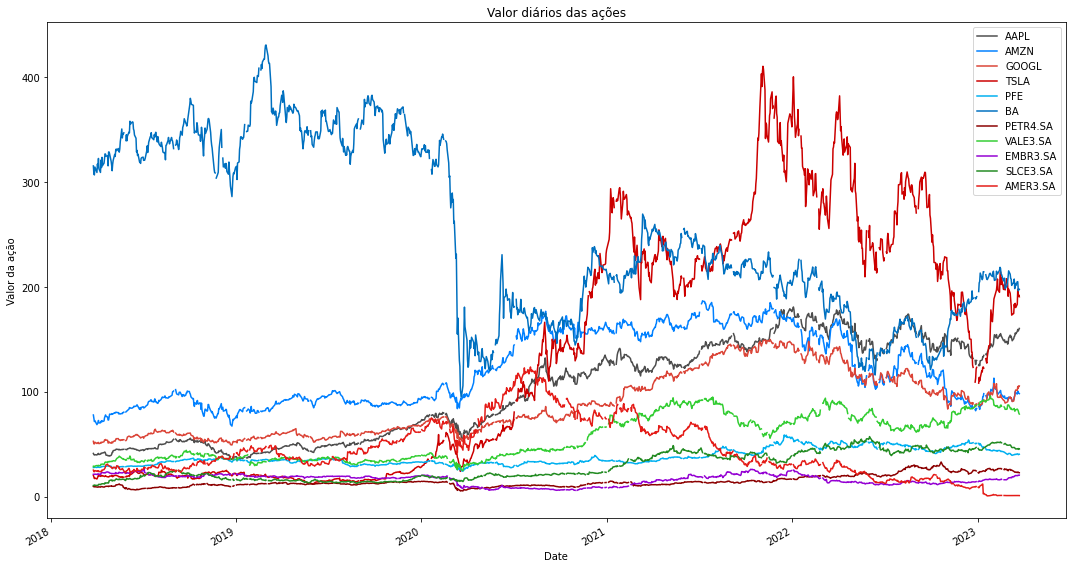

In [295]:
fig, ax = plt.subplots(figsize=(15, 8))

for ticker in tickers:
    data[ticker].plot(ax=ax, label=ticker, color=ticker_colors[ticker])

ax.set_ylabel("Valor da ação")
ax.set_title("Valor diários das ações")
ax.legend()
plt.tight_layout()
plt.show()

## Calculando Retornos

Calculando agora o retorno a partir da variação percentual entre a série histórica da bolsa, referente de um dia para o outro.

In [296]:
# Calcular retornos diários
returns = data.pct_change().dropna()
returns.head()

,AAPL,AMER3.SA,AMZN,BA,EMBR3.SA,GOOGL,PETR4.SA,PFE,SLCE3.SA,TSLA,VALE3.SA
Date,,,,,,,,,,,
2018-03-27,-0.025641,-0.056003,-0.037799,-0.023862,0.002804,-0.044730,-0.026782,-0.000856,0.013934,-0.082188,-0.027143
2018-03-28,-0.011049,-0.000406,-0.043840,-0.003426,-0.002796,-0.001748,-0.011194,0.008283,0.032164,-0.076653,0.016642
2018-03-29,0.007809,0.042276,0.011122,0.024561,0.007009,0.031795,0.009906,0.005382,-0.021246,0.032392,0.016129
2018-04-02,-0.006556,-0.027691,-0.052061,-0.016591,-0.011601,-0.023632,-0.023821,-0.012398,-0.017945,-0.051291,0.018716
2018-04-03,0.010259,0.022864,0.014621,0.025989,0.014085,0.005974,-0.009091,0.017974,0.006189,0.059609,-0.003023


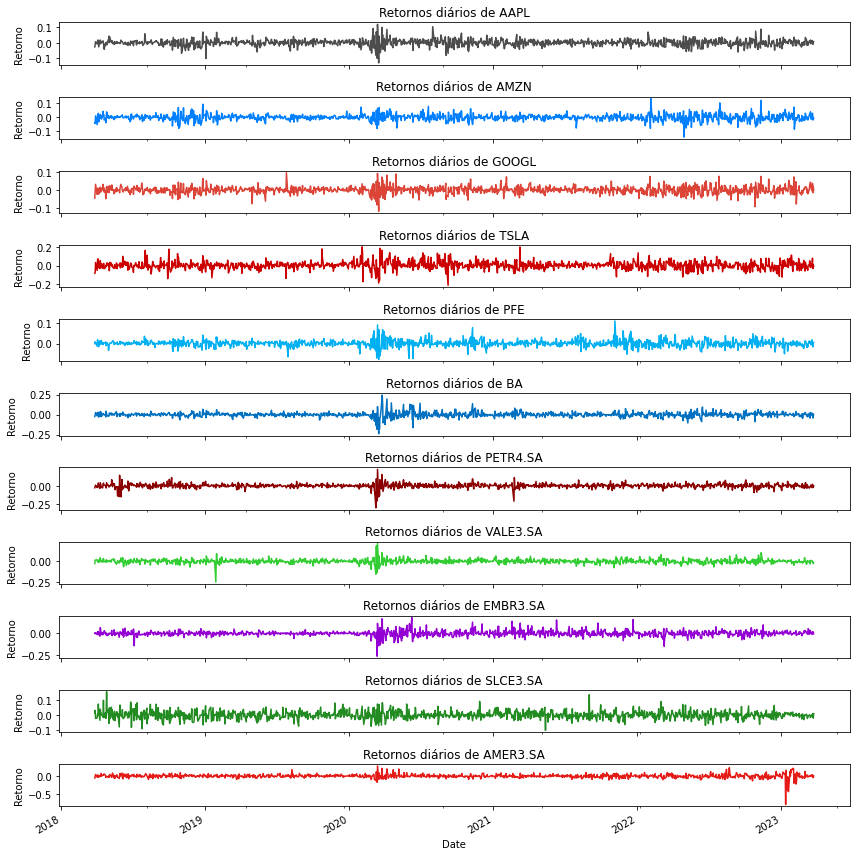

In [297]:
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(12, 12), sharex=True)

for i, ticker in enumerate(tickers):
    returns[ticker].plot(ax=axes[i], title=f'Retornos diários de {ticker}', color=ticker_colors[ticker])
    axes[i].set_ylabel('Retorno')

plt.tight_layout()
plt.show()

Definindo a função `neg_log_likelihood` para calcular o valor negativo da função de log-verossimilhança para uma distribuição normal, dados um conjunto de parâmetros (média `mu` e desvio padrão `sigma`) e os dados observados. Essa função é geralmente usada em conjunto com um algoritmo de otimização para encontrar os parâmetros que minimizam a função de log-verossimilhança negativa, o que, por sua vez, maximiza a função de log-verossimilhança original.

A função aceita dois argumentos: params, que é uma lista ou array contendo os parâmetros da distribuição normal (`mu` e `sigma`) e data, que é uma lista ou array contendo os dados observados.

In [298]:
def neg_log_likelihood(params, data):
    mu, sigma = params
    return -np.sum(norm.logpdf(data, mu, sigma))

Agora iremos realizar uma execução com base nas ações para minimizar o erro, e estimar a verossimilhança, encontrando os valores ótimos para `mu` e `sigma`.

In [299]:
# Estimar os parâmetros MLE para cada ticker
params = []
for ticker in tickers:
    ret = returns[ticker]
    init_params = np.array([0, 1])
    result = minimize(neg_log_likelihood, init_params, args=(ret), bounds=((None, None), (1e-5, None)))
    params.append(result.x)

Desta forma, com base no `mu` e `sigma` são utilizados para calcular a distribuição cumultativa (CDF) da distribuição normal e assim conseguir calcular a probabilidade de sucesso e risco.

A função CDF representa a probabilidade de um valor aleatório, neste contexto a representação do retorno dos ativos, essa probabilidade pode se rinterpretada como probabilidade de sucesso, ou seja, a probabilidade de obter um retorno positivo.

Já o risco é calculado como um complemento para probabilidade de sucesso, ou seja, a probabilidade de obter um retorno negativo.

In [300]:
# Calcular a probabilidade de sucesso e risco
results = []
for i, ticker in enumerate(tickers):
    mu, sigma = params[i]
    success_prob = norm.cdf(0, mu, sigma)
    risk = 1 - success_prob
    results.append((ticker, success_prob, risk))

Agora ordenando os resultado avaliando as açoes, temos então o resuldo a seguir:

In [301]:
def color_risk(row):
    colors = []
    for val in row:
        if row.name < 5:  # Os primeiros 5 itens têm índices de 0 a 4
            colors.append('background-color: green')
        else:
            colors.append('background-color: red')
    return colors


In [302]:
# Criar um DataFrame com os resultados
df_results = pd.DataFrame(results, columns=['Ticker', 'Probabilidade de Sucesso', 'Risco'])

# Ordenar os resultados com base na maior probabilidade de sucesso
df_results.sort_values(by='Probabilidade de Sucesso', ascending=False, inplace=True)

# Exibir o DataFrame
df_results_styled = df_results.style.apply(color_risk, axis=1)

df_results_styled

,Ticker,Probabilidade de Sucesso,Risco
10,AMER3.SA,0.505697,0.494303
5,BA,0.498271,0.501729
8,EMBR3.SA,0.493977,0.506023
1,AMZN,0.492313,0.507687
4,PFE,0.489592,0.510408
2,GOOGL,0.485217,0.514783
6,PETR4.SA,0.485037,0.514963
7,VALE3.SA,0.482680,0.517320
9,SLCE3.SA,0.477379,0.522621
0,AAPL,0.475622,0.524378



Para lidar com a incerteza, o tomador de decisões precisa coletar mais informações por meio de várias abordagens, como:

`a)` Consultar especialistas: procurar o conhecimento e a experiência de pessoas com um histórico comprovado na área em questão pode fornecer informações valiosas e ajudar a tomar decisões mais informadas.

`b)` Coletar novos dados: a realização de pesquisas adicionais, como pesquisas de mercado, análises de tendências ou coleta de dados em tempo real, pode ajudar a identificar padrões ou mudanças que podem afetar a tomada de decisão.

`c)` Pesquisa bibliográfica sobre o problema: revisar a literatura acadêmica e profissional existente sobre o problema em questão pode fornecer uma base sólida para a tomada de decisões e ajudar a identificar abordagens, métodos ou soluções que funcionaram (ou não funcionaram) no passado.

Ao coletar e analisar essas informações adicionais, o tomador de decisões pode estar mais bem preparado para lidar com a incerteza e tomar decisões mais informadas e eficazes, levando em consideração os riscos associados.
